In [7]:
import sqlite3
import datetime
import random
import pandas as pd
import matplotlib.pyplot as plt

# You are an expert Python developer who builds readable code. Together we will work on an application that has a database to store information, code to retrieve data from the database, and analytics that will run on the retrieved data.

# First, let's create the database, which has a table for companies. The table will have three columns, the first is an id, the second the ticker for the company, the third is the name of the company. Create this, and synthesize data for 10 companies, adding that to the database.

# Connect to the database (or create it if it doesn't exist)
conn = sqlite3.connect("companies.db")
cursor = conn.cursor()

# Create the companies table
cursor.execute(
    """
CREATE TABLE IF NOT EXISTS companies (
    id INTEGER PRIMARY KEY,
    ticker TEXT NOT NULL,
    name TEXT NOT NULL
)
"""
)

# Synthesize data for 10 companies
companies = [
    (1, "AAPL", "Apple Inc."),
    (2, "MSFT", "Microsoft Corporation"),
    (3, "GOOGL", "Alphabet Inc."),
    (4, "AMZN", "Amazon.com Inc."),
    (5, "FB", "Meta Platforms Inc."),
    (6, "TSLA", "Tesla Inc."),
    (7, "BRK.A", "Berkshire Hathaway Inc."),
    (8, "V", "Visa Inc."),
    (9, "JNJ", "Johnson & Johnson"),
    (10, "WMT", "Walmart Inc."),
]

# Insert the data into the companies table
cursor.executemany(
    """
INSERT INTO companies (id, ticker, name)
VALUES (?, ?, ?)
""",
    companies,
)

# Now add another table called 'TimeSeries' that has four columns, an id for the row, the id for one of the companies, a value, and a date. Populate this with about 100 values per company, and have the dates be successive.
# Create the TimeSeries table

cursor.execute(
    """
CREATE TABLE IF NOT EXISTS TimeSeries (
    id INTEGER PRIMARY KEY,
    company_id INTEGER,
    value REAL,
    date TEXT,
    FOREIGN KEY (company_id) REFERENCES companies (id)
)
"""
)

# Generate and insert data for the TimeSeries table
time_series_data = []
start_date = datetime.date(2023, 1, 1)

for company in companies:
    company_id = company[0]
    for i in range(100):
        value = round(random.uniform(100, 500), 2)
        date = start_date + datetime.timedelta(days=i)
        time_series_data.append((None, company_id, value, date.isoformat()))

cursor.executemany(
    """
INSERT INTO TimeSeries (id, company_id, value, date)
VALUES (?, ?, ?, ?)
""",
    time_series_data,
)

# Commit the transaction and close the connection
conn.commit()
conn.close()

In [8]:
# Connect to the database (or create it if it doesn't exist)
conn = sqlite3.connect("companies.db")
cursor = conn.cursor()

# Read and list top 10 records from the companies table
cursor.execute("SELECT * FROM companies LIMIT 10")
companies_records = cursor.fetchall()
print("Top 10 records from companies table:")
for record in companies_records:
    print(record)

# Read and list top 10 records from the TimeSeries table
cursor.execute("SELECT * FROM TimeSeries LIMIT 50")
timeseries_records = cursor.fetchall()
print("\nTop 50 records from TimeSeries table:")
for record in timeseries_records:
    print(record)

# Commit the transaction and close the connection
conn.close()

Top 10 records from companies table:
(1, 'AAPL', 'Apple Inc.')
(2, 'MSFT', 'Microsoft Corporation')
(3, 'GOOGL', 'Alphabet Inc.')
(4, 'AMZN', 'Amazon.com Inc.')
(5, 'FB', 'Meta Platforms Inc.')
(6, 'TSLA', 'Tesla Inc.')
(7, 'BRK.A', 'Berkshire Hathaway Inc.')
(8, 'V', 'Visa Inc.')
(9, 'JNJ', 'Johnson & Johnson')
(10, 'WMT', 'Walmart Inc.')

Top 50 records from TimeSeries table:
(1, 1, 384.83, '2023-01-01')
(2, 1, 100.58, '2023-01-02')
(3, 1, 313.87, '2023-01-03')
(4, 1, 250.4, '2023-01-04')
(5, 1, 164.94, '2023-01-05')
(6, 1, 113.39, '2023-01-06')
(7, 1, 405.24, '2023-01-07')
(8, 1, 129.08, '2023-01-08')
(9, 1, 236.83, '2023-01-09')
(10, 1, 194.09, '2023-01-10')
(11, 1, 490.03, '2023-01-11')
(12, 1, 319.01, '2023-01-12')
(13, 1, 420.05, '2023-01-13')
(14, 1, 140.42, '2023-01-14')
(15, 1, 343.94, '2023-01-15')
(16, 1, 391.32, '2023-01-16')
(17, 1, 361.8, '2023-01-17')
(18, 1, 137.52, '2023-01-18')
(19, 1, 304.74, '2023-01-19')
(20, 1, 321.95, '2023-01-20')
(21, 1, 439.34, '2023-01-21')


In [9]:
import pandas as pd

# Now create code that when given a company ticker or an ID that it will extract the data for that company, and the time series data and load it into an company object. This object should have fields and functions for calculating and storing high_bollinger which is the same data type as the time series, low_bollinger which is the same, moving_average which is the same, and a grade field which is a string. For the bollinger bands and moving average create config parameters which can be updated to modify the bands in charts.


class Company:
    def __init__(self, company_id, ticker, name):
        self.company_id = company_id
        self.ticker = ticker
        self.name = name
        self.time_series = None
        self.high_bollinger = None
        self.low_bollinger = None
        self.moving_average = None
        self.grade = None
        self.bollinger_window = 20
        self.bollinger_std_dev = 2
        self.moving_average_window = 20

    def load_time_series(self, cursor):
        cursor.execute(
            "SELECT date, value FROM TimeSeries WHERE company_id = ?",
            (self.company_id,),
        )
        data = cursor.fetchall()
        self.time_series = pd.DataFrame(data, columns=["date", "value"])
        self.time_series["date"] = pd.to_datetime(self.time_series["date"])
        self.time_series.set_index("date", inplace=True)

    def calculate_moving_average(self):
        self.moving_average = (
            self.time_series["value"].rolling(window=self.moving_average_window).mean()
        )

    def calculate_bollinger_bands(self):
        rolling_mean = (
            self.time_series["value"].rolling(window=self.bollinger_window).mean()
        )
        rolling_std = (
            self.time_series["value"].rolling(window=self.bollinger_window).std()
        )
        self.high_bollinger = rolling_mean + (rolling_std * self.bollinger_std_dev)
        self.low_bollinger = rolling_mean - (rolling_std * self.bollinger_std_dev)

    def update_grade(self, grade):
        self.grade = grade


def get_company_data(company_identifier, cursor):
    if isinstance(company_identifier, int):
        cursor.execute(
            "SELECT id, ticker, name FROM companies WHERE id = ?", (company_identifier,)
        )
    else:
        cursor.execute(
            "SELECT id, ticker, name FROM companies WHERE ticker = ?",
            (company_identifier,),
        )
    company_data = cursor.fetchone()
    if company_data:
        company = Company(*company_data)
        company.load_time_series(cursor)
        company.calculate_moving_average()
        company.calculate_bollinger_bands()
        return company
    else:
        return None

In [10]:
# Now write code to get company data for one company and print data

# Connect to the database
conn = sqlite3.connect("companies.db")
cursor = conn.cursor()

# Get company data for a specific company (e.g., company with ID 1)
company = get_company_data(1, cursor)

# Print company data
if company:
    print(f"Company ID: {company.company_id}")
    print(f"Ticker: {company.ticker}")
    print(f"Name: {company.name}")
    print(f"Time Series Data:\n{company.time_series.head()}")
    print(f"Moving Average:\n{company.moving_average.head()}")
    print(f"High Bollinger Band:\n{company.high_bollinger.head()}")
    print(f"Low Bollinger Band:\n{company.low_bollinger.head()}")
    print(f"Grade: {company.grade}")
else:
    print("Company not found")

# Close the connection
conn.close()

Company ID: 1
Ticker: AAPL
Name: Apple Inc.
Time Series Data:
             value
date              
2023-01-01  384.83
2023-01-02  100.58
2023-01-03  313.87
2023-01-04  250.40
2023-01-05  164.94
Moving Average:
date
2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
Name: value, dtype: float64
High Bollinger Band:
date
2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
Name: value, dtype: float64
Low Bollinger Band:
date
2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
Name: value, dtype: float64
Grade: None


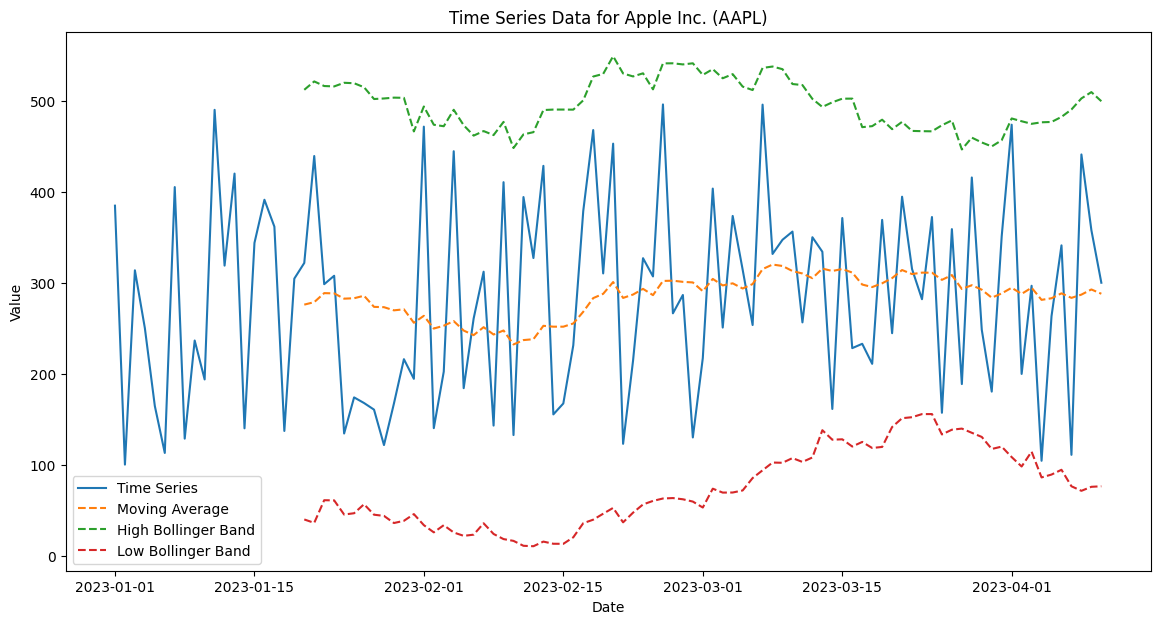

In [11]:
# Now can you write code using Seabourne or Matplotlib to plot the time series data for a company, and use the already calculated bollinger data to overlay the high bollinger, low bollinger, and moving average on the same plot?
import matplotlib.pyplot as plt

# Plot the time series data along with Bollinger Bands and Moving Average
plt.figure(figsize=(14, 7))
plt.plot(company.time_series.index, company.time_series["value"], label="Time Series")
plt.plot(
    company.moving_average.index,
    company.moving_average,
    label="Moving Average",
    linestyle="--",
)
plt.plot(
    company.high_bollinger.index,
    company.high_bollinger,
    label="High Bollinger Band",
    linestyle="--",
)
plt.plot(
    company.low_bollinger.index,
    company.low_bollinger,
    label="Low Bollinger Band",
    linestyle="--",
)

plt.title(f"Time Series Data for {company.name} ({company.ticker})")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()